In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BTC2019-2024.csv')
df1 = df.reset_index()['Open']

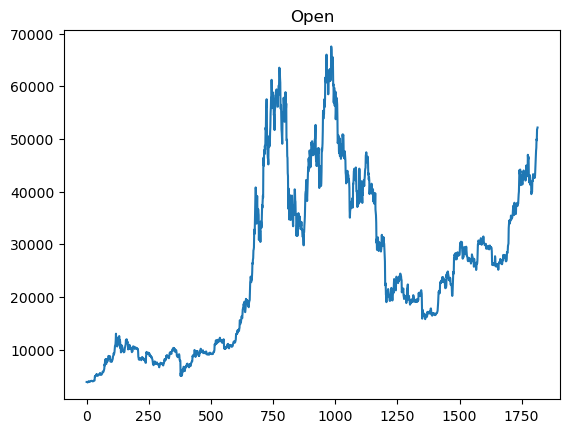

In [3]:
plt.plot(df1)
plt.title("Open")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1351, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.36235944, 0.36092947, 0.35962335, 0.33923655, 0.3596684 ,
       0.36002029, 0.35960841, 0.33687292, 0.35972721, 0.33726996,
       0.33829382, 0.33786369, 0.33672882, 0.33626842, 0.33476191,
       0.33597939, 0.33013479, 0.33345796, 0.33534924, 0.33631354,
       0.33648278, 0.33800752, 0.36946117, 0.4228662 , 0.42645141,
       0.42785889, 0.42849542, 0.42811807, 0.42608285, 0.42749636,
       0.4263439 , 0.42801814, 0.42770448, 0.42818028, 0.42804393,
       0.42886213, 0.42817131, 0.42823085, 0.42599093, 0.42625898,
       0.42693022, 0.42601398, 0.42663221, 0.42724509, 0.42561955,
       0.42964706, 0.4257689 , 0.42529935, 0.42582086, 0.42555403,
       0.42537912, 0.42726363, 0.42525841, 0.42514063, 0.42526567,
       0.42559738, 0.40981499, 0.41135457, 0.42418964, 0.41183506,
       0.42388895, 0.42447107, 0.42010418, 0.41158772, 0.42513107,
       0.41088685, 0.41063001, 0.40824801, 0.40826958, 0.4083017 ,
       0.41076017, 0.42592565, 0.42384383, 0.42411216, 0.42396

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.35965153, 0.35629354, 0.34971726, 0.33642155, 0.3479826 ,
       0.34816824, 0.34870458, 0.33227487, 0.34567618, 0.33231041,
       0.33046829, 0.3295064 , 0.32879942, 0.32777074, 0.32808106,
       0.32852453, 0.3114793 , 0.32386184, 0.3273675 , 0.32843287,
       0.32887979, 0.33158752, 0.36683735, 0.41007396, 0.41790693,
       0.42788948, 0.42599743, 0.426168  , 0.42140372, 0.4282227 ,
       0.42180202, 0.42617975, 0.42648558, 0.42726381, 0.42774586,
       0.43083862, 0.42966572, 0.42735095, 0.42259648, 0.42223012,
       0.42271892, 0.42337564, 0.42464252, 0.42830153, 0.42415966,
       0.43451758, 0.42324121, 0.42227903, 0.42182966, 0.42211628,
       0.42041744, 0.42271402, 0.41938604, 0.42057909, 0.41965619,
       0.42108323, 0.41021764, 0.41152991, 0.41625057, 0.41097544,
       0.4132655 , 0.41640188, 0.41275016, 0.41114284, 0.41831876,
       0.41054397, 0.4106518 , 0.40707813, 0.40662638, 0.40676871,
       0.40995967, 0.41892301, 0.41668957, 0.41593505, 0.41607

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))


Chỉ số MSE trên tập test
Random Forest: 0.0004
Bagging: 0.0004


### Trực quan

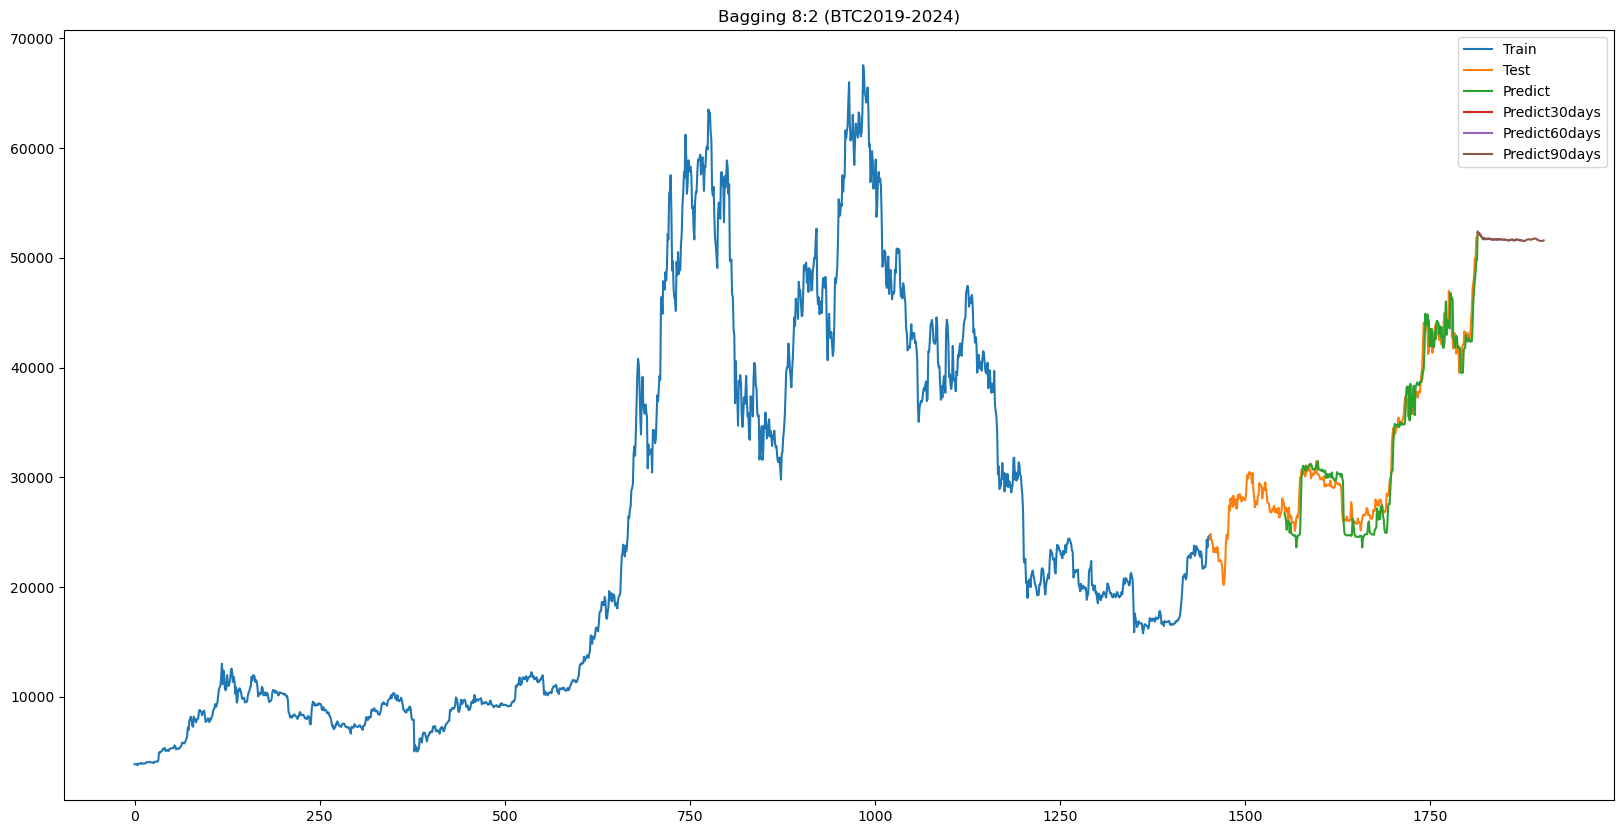

In [29]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 8:2 (BTC2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()